### Import libraries

In [1]:
library(tidyverse)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Read data

In [2]:
bankData <- read.csv('~/Downloads/data-models/Lecture 7 - Model statistical distribution/bank-data.csv', sep=';')
sData <- read_xlsx('~/Downloads/data-models/Lecture 7 - Model statistical distribution/M2_Superstore.xlsx', sheet = 1)

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L2236 / R2236C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L5276 / R5276C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L8800 / R8800C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9148 / R9148C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9149 / R9149C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9150 / R9150C12: '05408'”
Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
“Coercing text to numeric in L9388 / R9388C12: '05408'”

### Empirical distribution
- Distribution from data is called empirical distribution

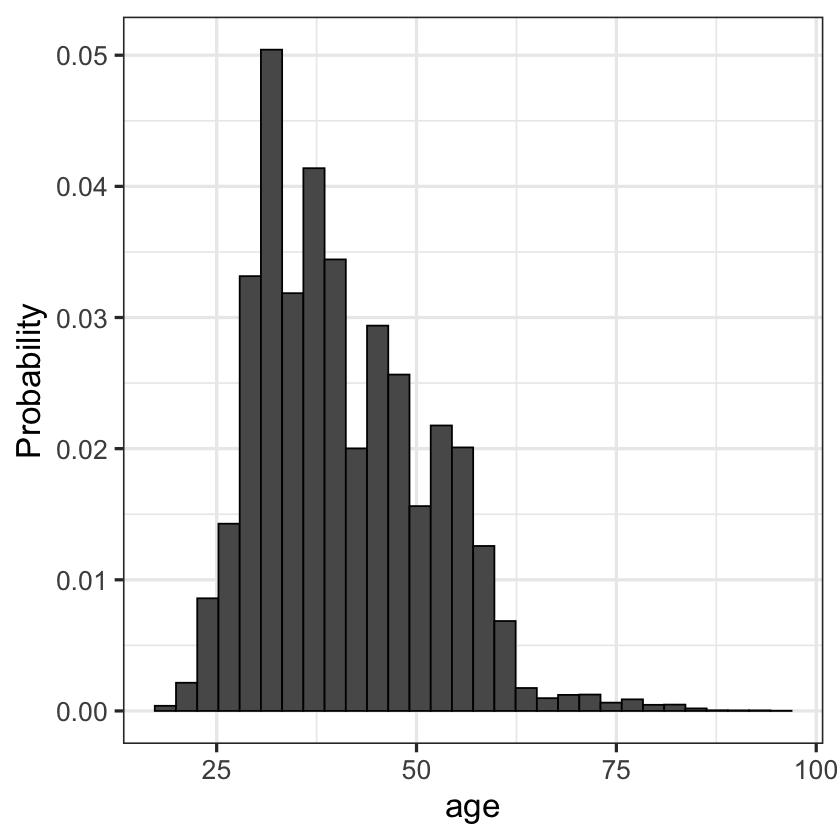

In [3]:
ggplot(bankData) +
geom_histogram(aes(x=age, y = ..density..), color = 'black', bins = 30) +
ylab('Probability') +
theme_bw(base_size = 20)

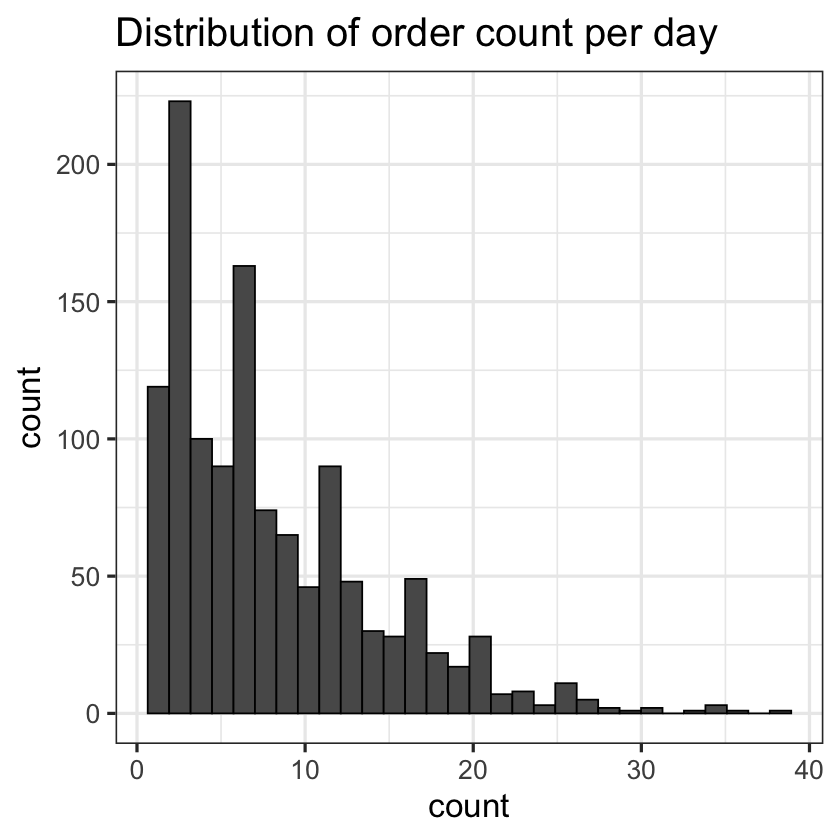

In [4]:
# count orders in a day
orderByDate <- sData %>% 
group_by(`Order Date`) %>% 
summarise(count = n())

ggplot(orderByDate) +
geom_histogram(aes(x = count), color = 'black', bins = 30) +
ggtitle('Distribution of order count per day') +
theme_bw(base_size = 20)

### Theoretical distribution
- Distribution with predefined characteristics and parameters

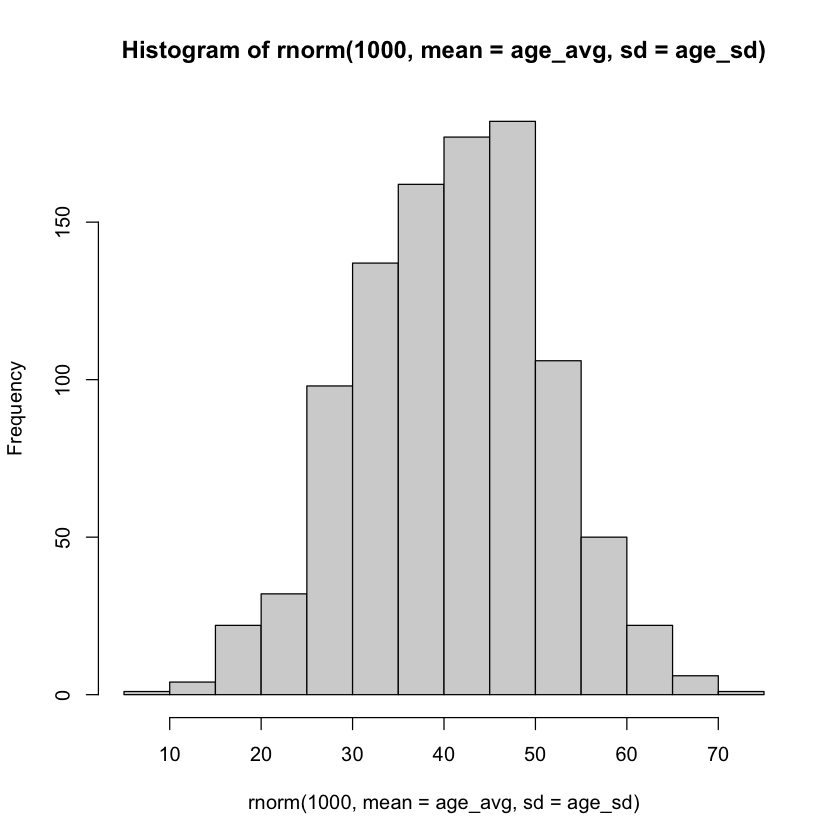

In [5]:
age_avg = mean(bankData$age)
age_sd = sd(bankData$age)
hist(rnorm(1000, mean = age_avg, sd = age_sd)) # sample from normal distribution with same mean and sd as age variable

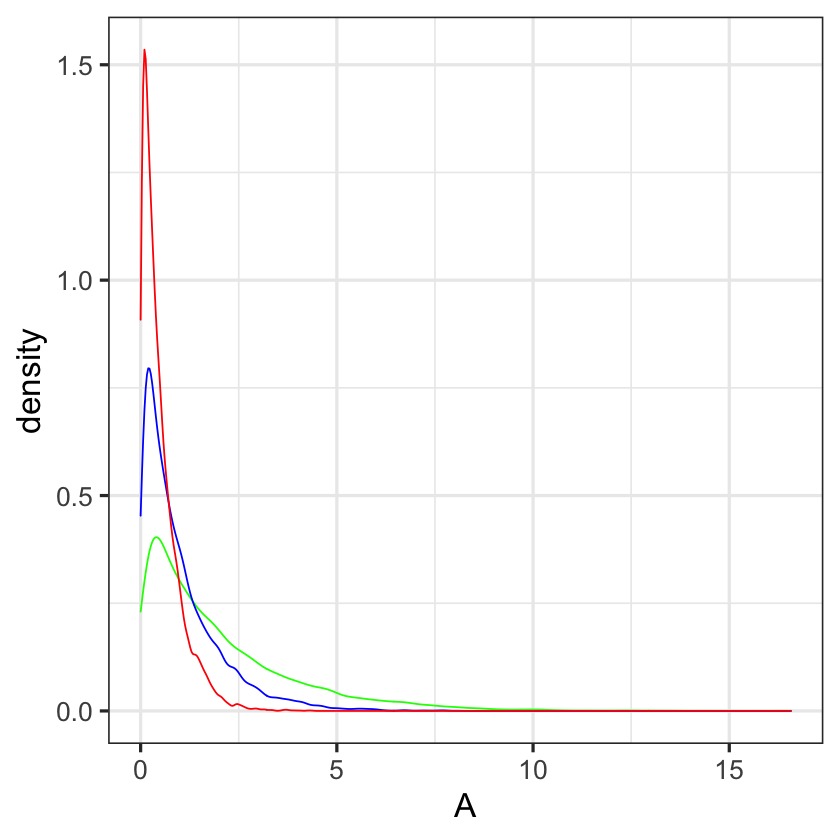

In [6]:
# sample from exponential distribution (model time between events)
x <- data.frame(A = rexp(10000, rate = 0.5), 
               B = rexp(10000, rate = 1), 
               C = rexp(10000, rate = 2))
ggplot(x) + 
geom_density(aes(x = A), color = 'green') + 
geom_density(aes(x = B),color = 'blue') + 
geom_density(aes(x = C),color = 'red') +
theme_bw(base_size = 20)

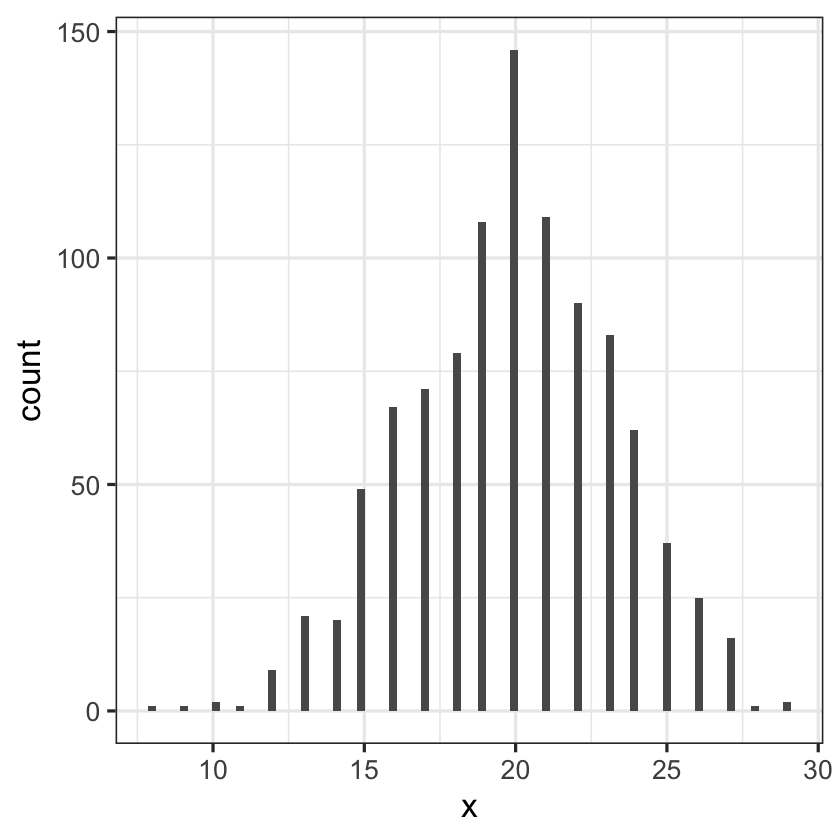

In [7]:
# generating count of success for binomial distribution with n = 40, p = 0.5
x <- NULL
for(i  in 1:1000) {
  x <- c(x, sum(ifelse(runif(40) > 0.5, 1, 0)))
}
ggplot(data.frame(x = x)) + 
geom_histogram(aes(x = x), bins = 80) +
theme_bw(base_size = 20)

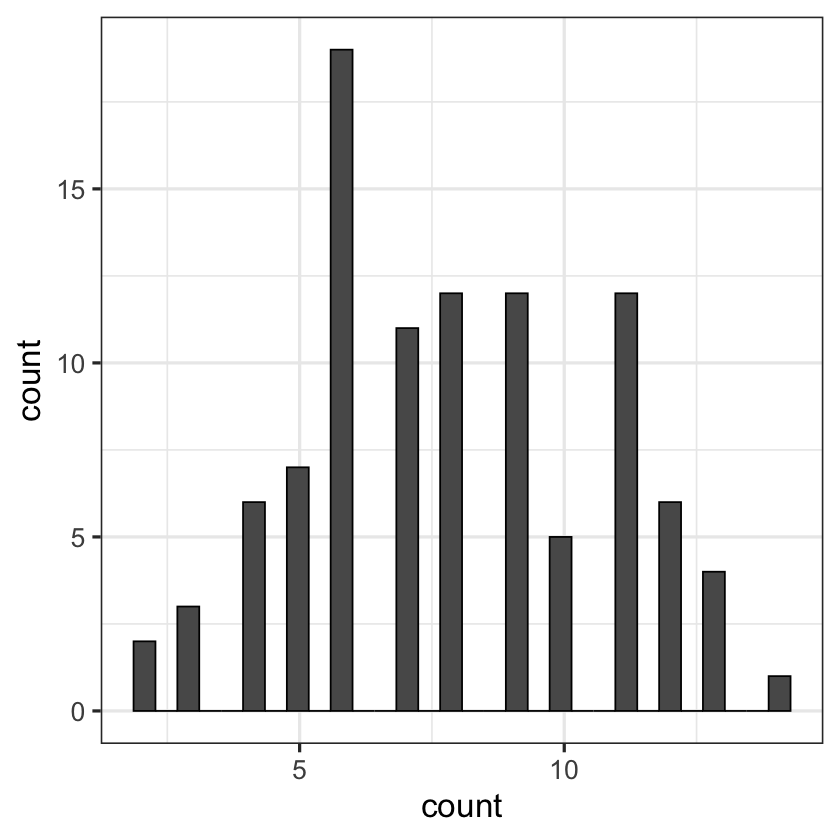

In [8]:
order_mean <- mean(orderByDate$count)
# sample from poisson distribution
x <- data.frame(count = rpois(100, lambda = 8)) # mean(orderByDate$count) = ~8

ggplot(x) +
geom_histogram(aes(x = count), color = 'black', bins = 30) +
theme_bw(base_size = 20)

### Empirical cummulative distribution
- Continuous variable

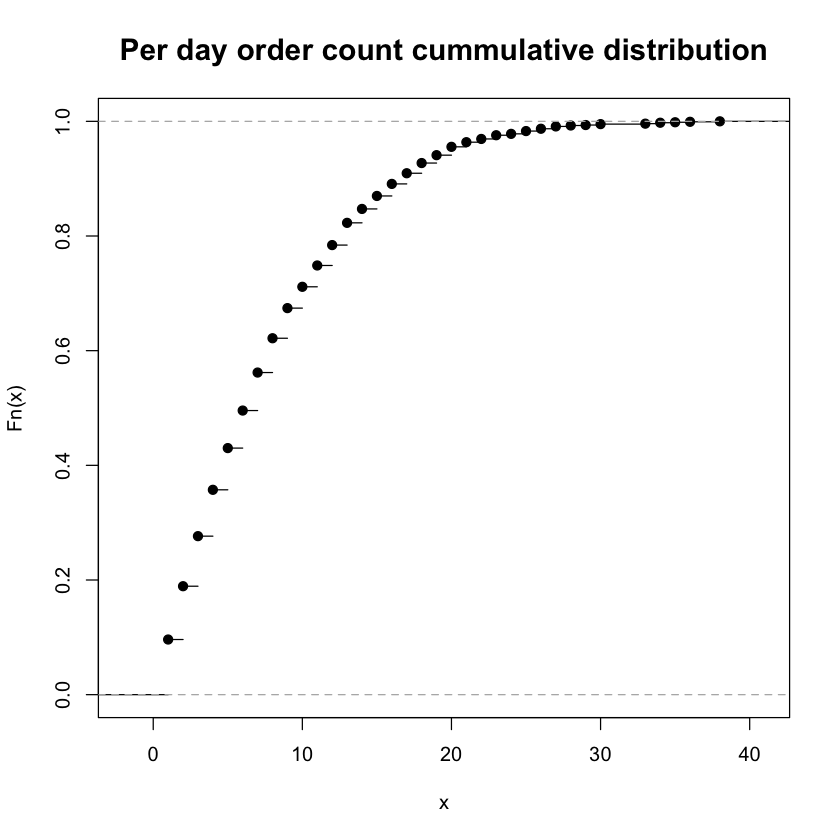

In [9]:
cdf <- ecdf(orderByDate$count)
plot(cdf, main = 'Per day order count cummulative distribution', cex.main = 1.5)

- Discrete variable

In [10]:
table(bankData$marital)/nrow(bankData)

x <- runif(1000)
marital <- ifelse(x < 0.115,'divorced', ifelse(x < 0.717,'married','single'))


 divorced   married    single 
0.1151711 0.6019332 0.2828958 

### Quantile
- Inverse of CDF is quantile

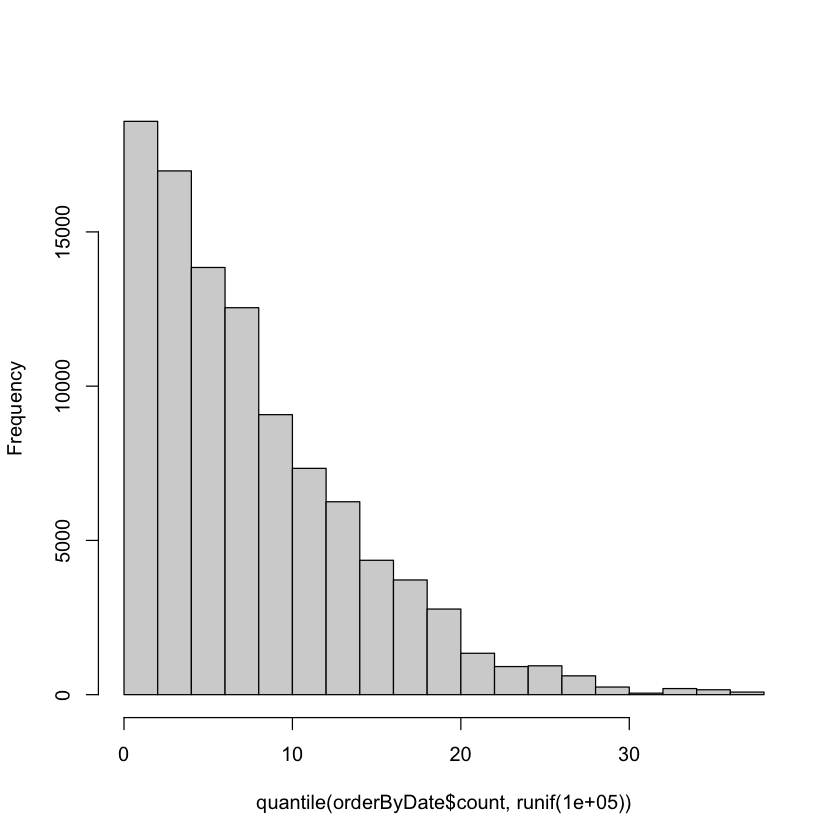

In [11]:
# sample order count
hist(quantile(orderByDate$count, runif(100000)), main = '')